In [1]:
import json
import csv
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data_dir = Path('../../data')

In [5]:
# transposing, so we have columns as features and rows as sample vectors
full_df = pd.read_csv(data_dir / 'mat4.csv').transpose()
full_df.shape

(4293, 55904)

### Assigning study_id, so we can use it for splitting

In [10]:
with open(data_dir / 'CellO_data/bulk_RNA_seq_training_set/experiment_to_study.json', 'r') as f:
    exp2study = json.load(f)

In [14]:
full_df.index.nunique(), len(full_df.index)

(4293, 4293)

In [21]:
full_df_studies = full_df.index.map(exp2study)
unique_studies = full_df_studies.unique()
len(unique_studies)

264

In [18]:
exps_per_study = full_df_studies.value_counts()
exps_per_study

SRP093349    377
SRP051848    188
SRP086078    138
SRP056840    133
SRP050000    129
            ... 
SRP041597      1
SRP075318      1
SRP058654      1
SRP082575      1
SRP080962      1
Length: 264, dtype: int64

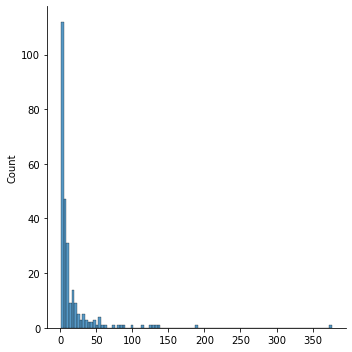

In [20]:
sns.displot(exps_per_study)

### Splitting all available studio into train and test

In [25]:
test_set_size = .1
train_ids, test_ids = train_test_split(unique_studies, test_size=test_set_size, random_state=42)
len(train_ids), len(test_ids)

(237, 27)

### Generating dataframes based on 

In [26]:
train_df = full_df[full_df_studies.isin(train_ids)]
train_df.shape

(3868, 55904)

In [27]:
test_df = full_df[full_df_studies.isin(test_ids)]
test_df.shape

(425, 55904)

### Storing the data

In [55]:
def store_csv(df, split):
    file_name = data_dir / f'CellO_data/bulk_RNA_seq_training_set/plier_{split}.csv'

    transposed_df = df.transpose()

    with open(file_name, 'w') as f:
        f.write(','.join(f'"{c}"' for c in transposed_df.columns))
        f.write('\n')

    transposed_df.to_csv(file_name, header=False, quoting=csv.QUOTE_NONNUMERIC, mode='a')

In [56]:
store_csv(test_df, 'test')

In [57]:
store_csv(train_df, 'train')

In [3]:
n_lines = 3

with open(data_dir / 'CellO_data/bulk_RNA_seq_training_set/plier_test.csv') as csv_file:
    head = [next(csv_file) for x in range(n_lines)]

# print(head)

In [6]:
head[1].split(',')[0]

'"TSPAN6"'

In [54]:
len(head[0].split(',')), len(head[1].split(','))

(425, 426)

In [ ]:
test_df = pd.read_csv(data_dir / 'mat4.csv').transpose()